In [ ]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/



*   ID	уникальный идентификатор
*   N_Days	количество дней между регистрацией и более ранним из следующих событий: смерть, трансплантация или время анализа исследования в июле 1986 г.
*   Status	Target	Categorical		статус пациента C (цензурировано), CL (цензурировано из-за трансплантации печени) или D (смерть)
*   Drug	Feature	Categorical		тип препарата D-пеницилламин или плацебо
*   Age	Feature	Integer	возраст
*   Sex	Feature	Categorical	Sex	M (male) or F (female)
*   Ascites	Feature	Categorical		наличие асцита N (Нет) или Y (Да)
*   Hepatomegaly	Feature	Categorical		наличие гепатомегалии N (Нет) или Y (Да)
*   Spiders	Feature	Categorical		наличие пауков N (Нет) или Y (Да)
*   Edema	Feature	Categorical		наличие отека N (отеки отсутствуют и не проводится терапия диуретиками), S (отеки присутствуют без диуретиков или отеки разрешились после приема диуретиков) или Y (отеки сохраняются, несмотря на терапию диуретиками)
*   Bilirubin	Feature	Continuous		сывороточный билирубин
*   Cholesterol	Feature	Integer		холестерин сыворотки
*   Albumin	Feature	Continuous		альбумин
*   Copper	Feature	Integer		медь в моче
*   Alk_Phos	Feature	Continuous		щелочная фосфатаза
*   SGOT	Feature	Continuous		СГОТ
*   Tryglicerides	Feature	Integer		триглицериды
*   Platelets	Feature	Integer		тромбоциты на кубический дюйм
*   Prothrombin	Feature	Continuous		протромбиновое время
*   Stage	Feature	Categorical		гистологическая стадия заболевания (1, 2, 3 или 4)





















In [ ]:
table = pd.read_csv('/content/drive/MyDrive/Сист. и тех. анализа данных/cirrhosis.csv', encoding='utf-8', sep=',')
with pd.option_context('display.max_columns',24): #Красивенько выводим
  display(table.head(10))


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
5,6,2503,D,Placebo,24201,F,N,Y,N,N,0.8,248.0,3.98,50.0,944.0,93.00,63.0,NaN,11.0,3.0
6,7,1832,C,Placebo,20284,F,N,Y,N,N,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,3.0
7,8,2466,D,Placebo,19379,F,N,N,N,N,0.3,280.0,4.00,52.0,4651.2,28.38,189.0,373.0,11.0,3.0
8,9,2400,D,D-penicillamine,15526,F,N,N,Y,N,3.2,562.0,3.08,79.0,2276.0,144.15,88.0,251.0,11.0,2.0
9,10,51,D,Placebo,25772,F,Y,N,Y,Y,12.6,200.0,2.74,140.0,918.0,147.25,143.0,302.0,11.5,4.0


In [ ]:
# Удаляем значения с "нет данных"
table=table.dropna()
table.shape

(276, 20)

In [ ]:
#Меняем категориальные на количественные
table['Status'] = pd.factorize(table['Status'])[0]
table['Drug'] = pd.factorize(table['Drug'])[0]
table['Sex'] = pd.factorize(table['Sex'])[0]
table['Ascites'] = pd.factorize(table['Ascites'])[0]
table['Hepatomegaly'] = pd.factorize(table['Hepatomegaly'])[0]
table['Spiders'] = pd.factorize(table['Spiders'])[0]
table['Edema'] = pd.factorize(table['Edema'])[0]
with pd.option_context('display.max_columns',20): #Красивенько выводим
  display(table.head(15))

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,0,0,21464,0,0,0,0,0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,1,0,20617,0,1,0,0,1,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,0,0,25594,1,1,1,1,2,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,0,0,19994,0,1,0,0,2,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,2,1,13918,0,1,0,0,1,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
6,7,1832,1,1,20284,0,1,0,1,1,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,3.0
7,8,2466,0,1,19379,0,1,1,1,1,0.3,280.0,4.00,52.0,4651.2,28.38,189.0,373.0,11.0,3.0
8,9,2400,0,0,15526,0,1,1,0,1,3.2,562.0,3.08,79.0,2276.0,144.15,88.0,251.0,11.0,2.0
9,10,51,0,1,25772,0,0,1,0,0,12.6,200.0,2.74,140.0,918.0,147.25,143.0,302.0,11.5,4.0
10,11,3762,0,1,19619,0,1,0,0,1,1.4,259.0,4.16,46.0,1104.0,79.05,79.0,258.0,12.0,4.0


In [ ]:
table['Status'].unique()

array([0, 1, 2])

In [ ]:
table['Status'].value_counts()

,count
Status,
1,147
0,111
2,18


In [ ]:
table = table.loc[table['Status'] != 2]

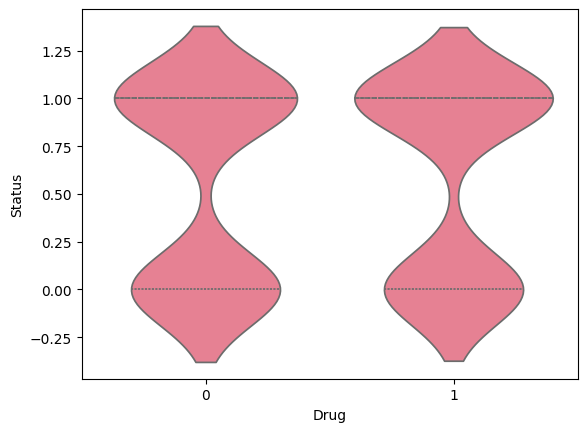

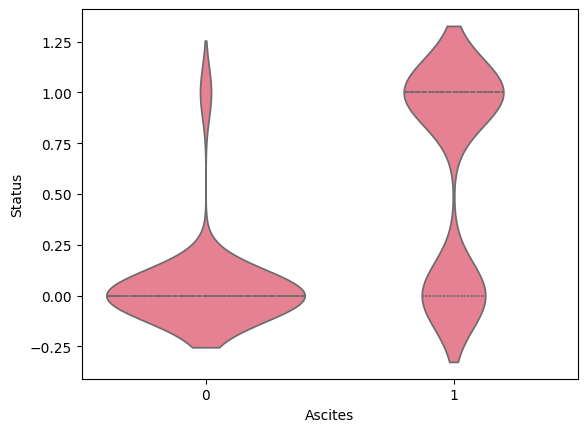

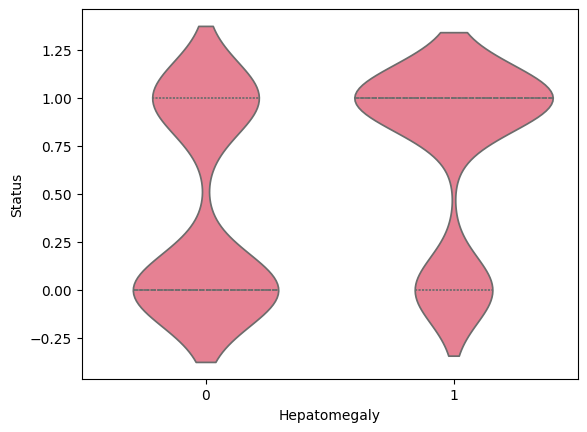

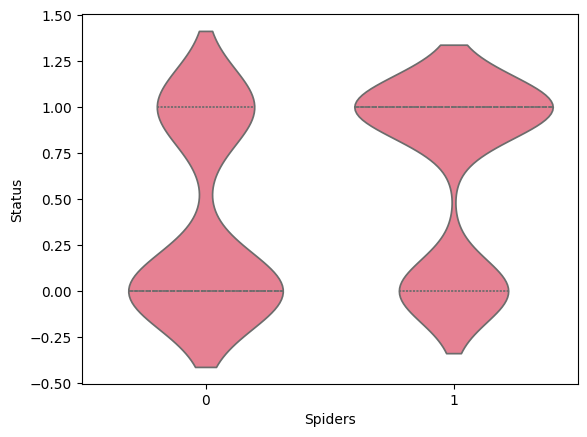

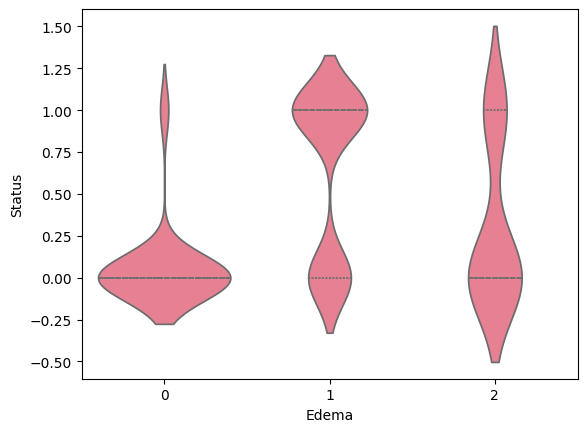

In [ ]:
# Скрипичный график.
# Используется для проверки сравнения распределения переменных:

sns.violinplot(y='Status', x='Drug', data=table, inner='quartile')
plt.show()
sns.violinplot(y='Status', x='Ascites', data=table, inner='quartile')
plt.show()
sns.violinplot(y='Status', x='Hepatomegaly', data=table, inner='quartile')
plt.show()
sns.violinplot(y='Status', x='Spiders', data=table, inner='quartile')
plt.show()
sns.violinplot(y='Status', x='Edema', data=table, inner='quartile')
plt.show()

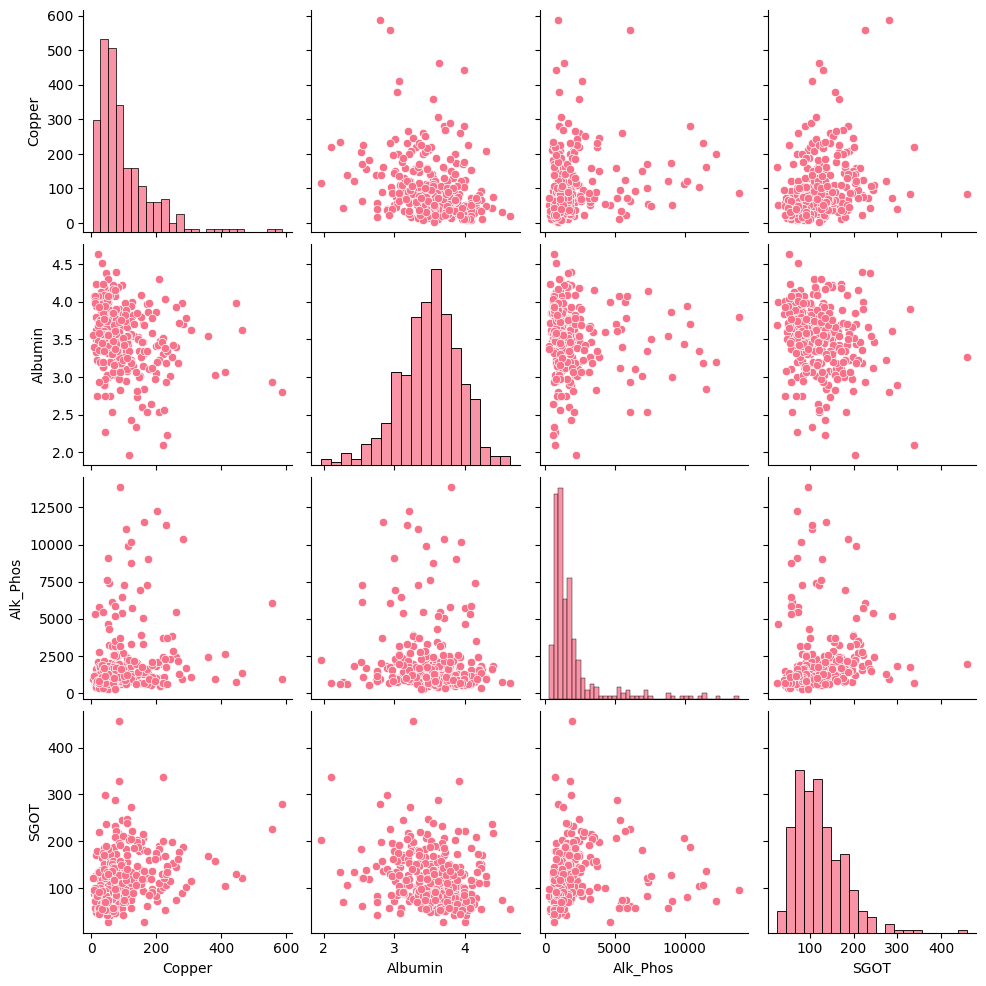

In [ ]:
# Парный график
#Построение нескольких попарных двумерных распределений в наборе данных с помощью pairplot:

sns.pairplot(table[['Copper','Albumin', 'Alk_Phos','SGOT']])
plt.show()

<Axes: >

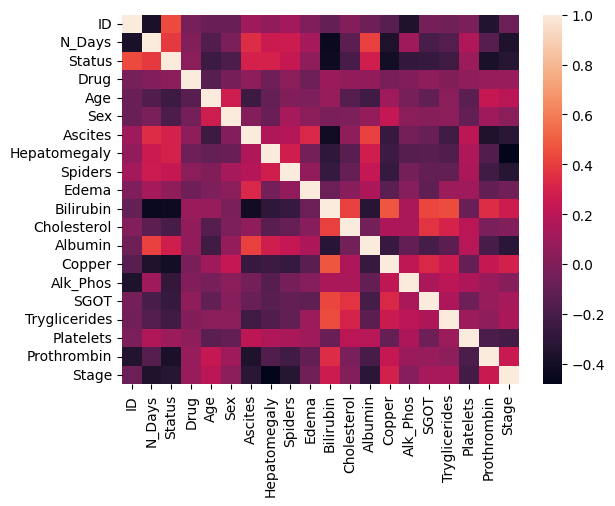

In [ ]:
sns.heatmap(table.corr())

На тепловой карте не обнаружено корреляции 0.7 и выше, следовательно парной линейной зависимости не будет обнаружено

In [ ]:
X = table.drop(['Status'], axis=1)
y = table['Status']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (258, 19) | y shape: (258,) 


In [ ]:
import scipy.stats as stats

# почему важно перемешивать и делать train и test статистически не различимыми по целевой переменной
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=False)

stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=-5.986466587011235, pvalue=7.212808663192481e-09, df=256.0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15, stratify=y)

stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=-0.11618424140258103, pvalue=0.9075976143488531, df=256.0)

In [ ]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.883333 (0.049590)
LDA: 0.863571 (0.075202)
KNN: 0.762143 (0.072909)
CART: 0.785952 (0.088458)
NB: 0.805714 (0.072408)
SVC: 0.567857 (0.014375)


Самый лучший результат выдал LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [ ]:
#Матрица ошибок
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[16  6]
 [ 3 27]]


На главной диагонали значения примерно равного диапазона, а ошибки минимальны

In [ ]:
#Выбрано 84 процента, 73 правильных ответов, точность 0,78

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        22
           1       0.82      0.90      0.86        30

    accuracy                           0.83        52
   macro avg       0.83      0.81      0.82        52
weighted avg       0.83      0.83      0.82        52



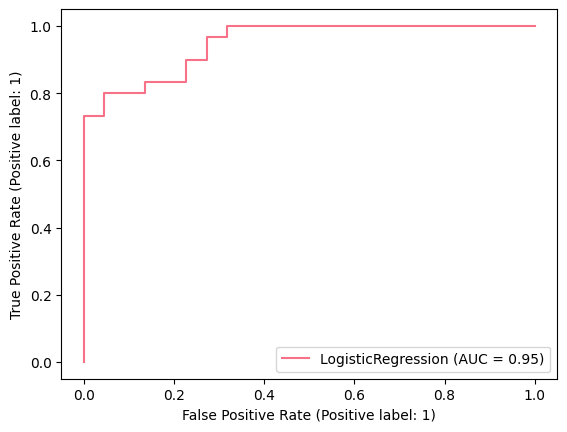

In [ ]:
#оценить точность предсказаний модели путем постройки графика чувствительности в зависимости от значения
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(logreg,X_test,y_test)

ROC-кривая близка к 1, следовательно построенная модель достоверно